In [ ]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#한글 시각화
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False



In [ ]:
reportrash = pd.read_csv('data/trashArticle.csv', index_col = 0)
display(reportrash.head(2))
reportrash.drop('기사본문url', axis = 1 , inplace = True)

#reportrash['기타사항'] = reportrash[['잘못된인용', '기타', '오보']].sum(axis = 1)
reportrash['사실 및 통계왜곡'] = reportrash[['사실왜곡', '가짜뉴스', '통계왜곡', '잘못된인용', '오보']].sum(axis = 1)

reportrash.drop(['잘못된인용', '기타', '오보', '사실왜곡', '통계왜곡', '가짜뉴스'], axis = 1, inplace = True)

reportrash.head(3)

In [ ]:
naverDF = pd.read_csv('data/naverNewsFinal.csv')
naverDF.tail(2)

##### 삭제~

- 헛소리선동
- 악의적헤드라인
- 사실왜곡
    - 사실왜곡 + 가짜뉴스 + 잘못된인용 + 통계왜곡 + 오보

In [2]:
import matplotlib
#한글 시각화
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
# 기타 : 잘못된인용, 기타, 오보
# 사실왜곡+통계왜곡 : 사실왜곡, 통계왜곡
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

reportrash = pd.read_csv('data/trashArticle.csv', index_col = 0)
reportrash.drop('기사본문url', axis = 1 , inplace = True)

reportrash['사실 및 통계왜곡'] = reportrash[['사실왜곡', '가짜뉴스', '통계왜곡', '잘못된인용', '오보']].sum(axis = 1)

reportrash.drop(['잘못된인용', '기타', '오보', '사실왜곡', '통계왜곡', '가짜뉴스'], axis = 1, inplace = True)

reportrash.head(3)

,newsID,제목,미디어,기자,게재일,제보횟수,악의적헤드라인,헛소리선동,사실 및 통계왜곡
0,5,공무원 확 늘리고 통계조작… 그 정책의 비극,조선일보,안상현,2018-09-11,49,1,18,8
1,7,강서구 아파트 주차장서 40대 흉기 피살…전 남편 유력 용의자로 긴급체포,동아일보,김혜란,2018-10-23,31,5,7,3
2,8,[오늘과 내일/이승헌]강경화가 대통령대행 승계 5위인 현실,동아일보,이승헌,2018-10-23,2,0,0,0


In [7]:
naverDF = pd.read_csv('data/naverNewsFinal.csv')
naverDF.tail(2)

,시각,카테고리,미디어,제목,내용,url,수정시간,감정표현,timestamp
7987205,2020.12.31. 오전 12:00,사회,동아일보,경기도 공공배달앱 ‘배달특급’ 20여일만에 거래액 20억 돌파,낮은 수수료로 배달매출에 기댄 소상공인들의 부담 확 덜어줘 경기 오산시에서 중국집을...,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,"[4, 0, 0, 1, 0]",1.610066e+09
7987206,2020.12.31. 오전 12:00,사회,뉴시스,녹유 오늘의 운세51년생 침이 고여지는 대접을 받아요,서울 뉴시스 녹유 錄喩 의 오늘의 운세 2020년 12월 31일 목요일 음력 11월...,https://news.naver.com/main/read.nhn?mode=LSD&...,NaN,"[0, 0, 0, 0, 0]",1.610066e+09


In [6]:
# def naverNewsRefine(df):
    
#     #df.drop(5, axis = 1 , inplace = True)
#     cleanDF = df.rename(columns = {0:'시각',
#                                    1 : '카테고리',
#                                    2 : '미디어',
#                                    3 : '제목', 
#                                    4 : '내용',
#                                    5 : 'url',
#                                    6:'수정시간', 
#                                    7:'감정표현', 
#                                    8:'timestamp'})
    
#     return cleanDF

In [ ]:
# politics2019 = naverNewsRefine(politics2019)
# social2019 = naverNewsRefine(social2019)
# economy2019 = naverNewsRefine(economy2019)
# politics2020 = naverNewsRefine(politics2020)
# social2020 = naverNewsRefine(social2020)
# economy2020 = naverNewsRefine(economy2020)


# naverDF = pd.concat([politics2019, economy2019, social2019, 
#                     politics2020, economy2020, social2020], ignore_index = True)


# del politics2019, economy2019, social2019, politics2020, economy2020, social2020


# naverDF.tail()

In [ ]:
naverDF['감정표현'][0]

In [ ]:
%%time

naverDF['감정표현'] = naverDF['감정표현'].apply(lambda x : [int(i) for i in x[1:-1].split(', ')])
naverDF = naverDF[~naverDF[['미디어', '제목']].duplicated()]          # 중복된 데이터가 많이존재 => 중복 제거
naverDF = naverDF.reset_index(drop = True) 
naverDF.tail(3)

- 헛소리선동
- 악의적헤드라인
- 사실왜곡
    - 사실왜곡 + 가짜뉴스 + 잘못된인용 + 통계왜곡 + 오보

In [ ]:
mergeDF = pd.merge(left = naverDF, right = reportrash, on = ['제목','미디어'])

mergeDF

In [ ]:
mergeDF['카테고리'].value_counts()

##### 제보횟수 및 가짜뉴스 미디어 별로 시각화

In [ ]:
mergeDF.groupby('미디어').sum()[['제보횟수','악의적헤드라인','헛소리선동','사실 및 통계왜곡']].sort_values(by = '사실 및 통계왜곡', ascending = False)

In [ ]:
mergeDF.groupby(['미디어','카테고리']).sum()[['제보횟수','악의적헤드라인','헛소리선동','사실 및 통계왜곡']].sort_values(by = '사실 및 통계왜곡', ascending = False).head(30)

##### ~미디어 별로 시각화

In [ ]:
fakenews = mergeDF[mergeDF['사실 및 통계왜곡'] >= 2]
fakenews

In [ ]:
fakenews

In [ ]:
fakenews.drop(['url','timestamp','헛소리선동','게재일'], axis = 1).tail(8)

In [ ]:
fakenews_prob_modify = fakenews['수정시간'].notna().sum()/fakenews.shape[0]
allnews_prob_modify = naverDF['수정시간'].notna().sum()/naverDF.shape[0]

print("가짜뉴스 수정 비율 : %.02f" %(fakenews_prob_modify*100))
print("전체 뉴스 수정 비율 : %.02f" %(allnews_prob_modify*100))

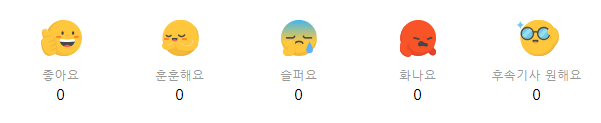
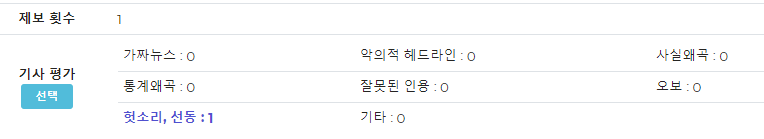
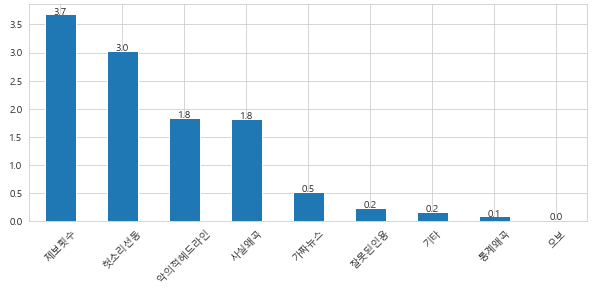

In [ ]:
def reactionPlot(df):
    
    barHeight = [np.mean([int(i[0]) for i in df['감정표현']]),
                      np.mean([int(i[1]) for i in df['감정표현']]),
                      np.mean([int(i[2]) for i in df['감정표현']]),
                      np.mean([int(i[3]) for i in df['감정표현']]),
                      np.mean([int(i[4]) for i in df['감정표현']])]
    
    return barHeight
    
fakeHeight = reactionPlot(fakenews)
navernewsHeight = reactionPlot(naverDF)

In [ ]:
reactionCountDF = pd.DataFrame([fakeHeight,navernewsHeight]).T

reactionCountDF.columns = ['fakeNews', 'naverNews']
reactionCountDF.index = ['좋아요', '훈훈해요', '슬퍼요', '화나요', '후속기사 원해요']
reactionCountDF

In [ ]:
reactionCountDF['fakeNews'] = round(reactionCountDF['fakeNews']/reactionCountDF['fakeNews'].sum() * 100,2).values
reactionCountDF['naverNews'] = round(reactionCountDF['naverNews']/reactionCountDF['naverNews'].sum() * 100,2).values

display(reactionCountDF)
reactionCountDF.plot(kind = 'bar')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
reactionCountDF

##### 가짜뉴스 정리 

In [ ]:
fakenews

In [ ]:
fakenews[fakenews['게재일'].isin(fakenews['게재일'].value_counts().head(3).index)]

In [ ]:
fakenews[fakenews['제목'].str.contains('윤석열')]

In [ ]:
angryPercent = fakenews['감정표현'].apply(lambda x : int(x[3]) / (sum([int(i) for i in x]) + 10e-10))
fakenews['angryPrecent'] = angryPercent
fakenews

In [ ]:
fakenewsManyReaction = fakenews[fakenews['감정표현'].apply(lambda x : sum(x)) > 20]
fakenewsManyReaction

In [ ]:
fakenewsManyReaction.sort_values(by = 'angryPrecent', ascending = False).head(30).drop(['url','timestamp'], axis = 1)

In [ ]:
import seaborn as sns

corrArray = np.vstack(fakenews['감정표현'].values)
totalScore = np.append(corrArray, fakenews[['악의적헤드라인', '헛소리선동', '사실 및 통계왜곡']].values, axis = 1)
corrDF = pd.DataFrame(totalScore)
corrDF.columns = ['좋아요', '훈훈해요', '슬퍼요', '화나요','후속기사원해요', '악의적헤드라인', '헛소리선동', '사실 및 통계왜곡']
sns.heatmap(corrDF.corr())

##### textRank

In [ ]:
import textrank
from textrank import KeywordSummarizer

from konlpy.tag import Komoran
from konlpy.tag import Okt

komoran = Komoran()

def komoran_tokenize(sent):
    words = komoran.pos(sent, join=True)
    words = [w for w in words if ('/NNG' in w or '/NNP' in w or '/XR' in w or '/VA' in w)]
    words = [w for w in words if len(w)>=2]
    return words


sents = fakenews.loc[:10, '내용']


keyword_extractor = KeywordSummarizer(
    tokenize = komoran_tokenize,
    window = -1,
    verbose = True
)

keywords = keyword_extractor.summarize(sents, topk=30)

In [ ]:
import re

testTXT = "('제재/NNG', 3.881464293680671)"
pattern = r"\(\'\w'"


re.match(pattern , testTXT)

In [ ]:
re.compile('\([a-zA-Z0-9가-힣]*').findall(testTXT)

##### crawling 감정표현

https://news.like.naver.com/v1/search/contents?suppress_response_codes=true&callback=jQuery1124042470535482791805_1609304384626&q=NEWS%5Bne_016_0001704674%5D%7CNEWS_SUMMARY%5B016_0001704674%5D%7CNEWS_MAIN%5Bne_016_0001704674%5D&isDuplication=false&_=1609304384627

##### uid, oid 추출

In [ ]:
import re

url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=023&aid=0003580257'

oid = re.findall('oid=(.*)&', url)[0]
aid = re.findall('aid=(.*)', url)[0]

In [ ]:
aid = re.findall('aid=(.*)', url)
aid

In [ ]:
import numpy as np

a = np.array([[1,1,1,1],
     [0,0,0,0],
     [1,2,3,4]])

a